In [151]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px
from sklearn.model_selection import train_test_split 

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score

In [152]:
# read dataset
data = pd.read_csv("./nasa.csv")
data.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [153]:
data.shape

(4687, 40)

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [155]:
# check missing value
(data.isnull().sum()*100/len(data)).sort_values(ascending=False)

Neo Reference ID                0.0
Name                            0.0
Orbit Determination Date        0.0
Orbit Uncertainity              0.0
Minimum Orbit Intersection      0.0
Jupiter Tisserand Invariant     0.0
Epoch Osculation                0.0
Eccentricity                    0.0
Semi Major Axis                 0.0
Inclination                     0.0
Asc Node Longitude              0.0
Orbital Period                  0.0
Perihelion Distance             0.0
Perihelion Arg                  0.0
Aphelion Dist                   0.0
Perihelion Time                 0.0
Mean Anomaly                    0.0
Mean Motion                     0.0
Equinox                         0.0
Orbit ID                        0.0
Orbiting Body                   0.0
Miss Dist.(miles)               0.0
Est Dia in Feet(min)            0.0
Absolute Magnitude              0.0
Est Dia in KM(min)              0.0
Est Dia in KM(max)              0.0
Est Dia in M(min)               0.0
Est Dia in M(max)           

In [156]:
# calculate missing value
data.isna().sum().sum()

0

In [157]:
# show unique value
data.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

In [158]:
# drop the mentioned variables from the dataset
df = data.drop(['Orbiting Body','Equinox','Neo Reference ID', 'Name','Close Approach Date','Epoch Date Close Approach','Orbit ID','Orbit Determination Date','Epoch Osculation','Perihelion Time'], axis = 1)
df.shape

(4687, 30)

In [159]:
# balancing data 755 each class
# Experiment with split dataset.

# df_true = df[df.Hazardous == True]
# df_false = df[df.Hazardous == False]
# df = df_true.append(df_false[:755])
# df.Hazardous.value_counts()

# FINAL Result : Random Forest
# Precission : 0.859108818675778
# Recall     : 0.8520971302428256
# F1 Score   : 0.8515593883580889

# SVM
# Precission : 0.621653727110819
# Recall     : 0.5695364238410596
# F1 Score   : 0.5108659321375767

# Naive Baiyes
# Precission : 0.6088581761802602
# Recall     : 0.6070640176600441
# F1 Score   : 0.604072943207535

# Trying using Library imblearn 
# df.groupby('Hazardous').count()
lenData = df['Hazardous'].count()
print(lenData)
data.groupby('Hazardous').count()


4687


,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox
Hazardous,,,,,,,,,,,,,,,,,,,,,
False,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932,...,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932
True,755,755,755,755,755,755,755,755,755,755,...,755,755,755,755,755,755,755,755,755,755


In [160]:
true_class = 755/lenData
print(true_class)

0.16108384894388736


In [161]:
x = df.drop(['Hazardous'],axis=1)
y = df['Hazardous']

from imblearn.over_sampling import SMOTE
x_resampled,y_resampled = SMOTE().fit_resample(x,y)

In [162]:
y_resampled.value_counts()

df = pd.concat([x_resampled,y_resampled],axis=1)
df

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,21.600000,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,6.115834,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,264.837533,0.590551,True
1,21.300000,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,1071.581063,18.113985,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,173.741112,0.845330,False
2,20.300000,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,1698.341531,7.590711,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,292.893654,0.559371,True
3,27.400000,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,64.569144,11.173874,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,68.741007,0.700277,False
4,21.600000,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,933.308089,9.840831,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,135.142133,0.726395,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7859,20.497805,0.238498,0.533297,238.497617,533.296884,0.148196,0.331375,782.472522,1749.661750,19.042999,...,1.029560,31.951221,103.846396,382.865053,0.880582,258.480569,1.178538,333.590177,0.955279,True
7860,20.155365,0.266679,0.596311,266.678603,596.311483,0.165706,0.370531,874.929826,1956.402567,19.030776,...,1.513865,5.817373,181.088109,682.550972,0.649313,172.019376,2.378418,137.936029,0.537826,True
7861,20.262011,0.240680,0.538176,240.679755,538.176293,0.149551,0.334407,789.631767,1765.670308,12.854953,...,1.877492,11.698439,158.405408,960.649692,0.893689,255.337357,2.861295,331.269558,0.428715,True
7862,20.238425,0.255729,0.571827,255.728886,571.827174,0.158903,0.355317,839.005560,1876.073465,32.696902,...,1.813508,9.458386,19.556965,911.124038,0.629947,229.096418,2.997070,62.798710,0.466703,True


In [163]:
df.groupby('Hazardous').count()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion
Hazardous,,,,,,,,,,,,,,,,,,,,,
False,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932,...,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932
True,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932,...,3932,3932,3932,3932,3932,3932,3932,3932,3932,3932


In [164]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [165]:
y=df["Hazardous"]
x=df.drop(["Hazardous"],axis=1)
df = normalize(x)
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion
0,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.130487,...,0.438763,0.177530,0.079736,0.873489,0.108378,0.596770,0.159035,0.146942,0.735825,0.258239
1,0.484241,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.401336,...,0.361224,0.110378,0.376677,0.379866,0.062396,0.522896,0.869714,0.084790,0.482720,0.388713
2,0.436485,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.163781,...,0.357628,0.189158,0.056020,0.720954,0.116882,0.713687,0.690049,0.142186,0.813777,0.242271
3,0.775549,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.244668,...,0.219426,0.143620,0.104671,0.158852,0.084473,0.740847,0.051949,0.088525,0.190984,0.314430
4,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.214576,...,0.212992,0.136823,0.222555,0.235139,0.079847,0.727546,0.439619,0.083102,0.375475,0.327805


<AxesSubplot:>

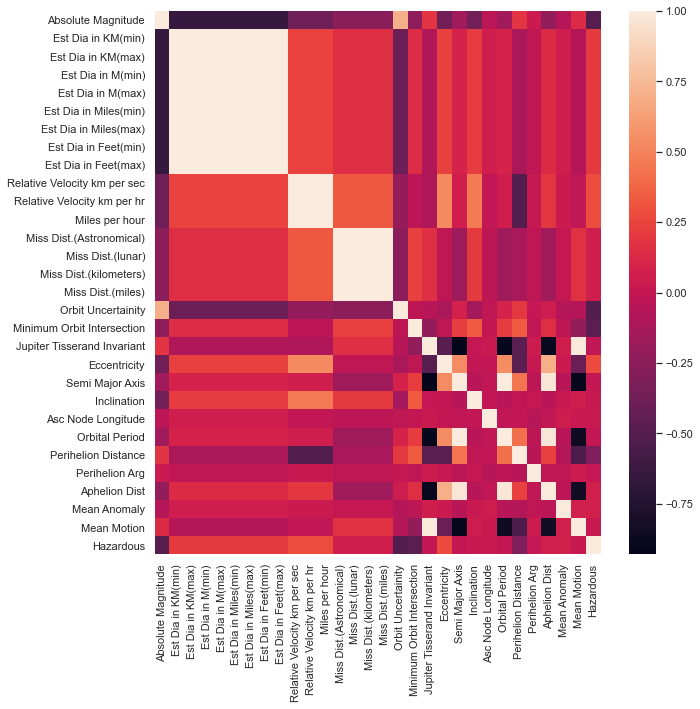

In [166]:
# show data correlation 
df = pd.concat([df,y],axis=1)

sns.set(style='darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

In [167]:
df.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Relative Velocity km per sec,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.130487,...,0.177530,0.079736,0.873489,0.108378,0.596770,0.159035,0.146942,0.735825,0.258239,True
1,0.484241,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.401336,...,0.110378,0.376677,0.379866,0.062396,0.522896,0.869714,0.084790,0.482720,0.388713,False
2,0.436485,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.163781,...,0.189158,0.056020,0.720954,0.116882,0.713687,0.690049,0.142186,0.813777,0.242271,True
3,0.775549,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.244668,...,0.143620,0.104671,0.158852,0.084473,0.740847,0.051949,0.088525,0.190984,0.314430,False
4,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.214576,...,0.136823,0.222555,0.235139,0.079847,0.727546,0.439619,0.083102,0.375475,0.327805,True


In [168]:
# drop unused feature
df = df.drop(['Est Dia in KM(max)','Est Dia in M(min)','Est Dia in M(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)',
'Relative Velocity km per sec','Miles per hour',
'Miss Dist.(Astronomical)','Miss Dist.(lunar)','Miss Dist.(miles)'],axis = 1)
print(df.shape)
df.head()

(7864, 18)


,Absolute Magnitude,Est Dia in KM(min),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,0.498567,0.008101,0.130487,0.839102,0.555556,0.052899,0.357007,0.438763,0.177530,0.079736,0.873489,0.108378,0.596770,0.159035,0.146942,0.735825,0.258239,True
1,0.484241,0.009311,0.401336,0.766123,0.333333,0.391164,0.477522,0.361224,0.110378,0.376677,0.379866,0.062396,0.522896,0.869714,0.084790,0.482720,0.388713,False
2,0.436485,0.014795,0.163781,0.101616,0.000000,0.090096,0.345731,0.357628,0.189158,0.056020,0.720954,0.116882,0.713687,0.690049,0.142186,0.813777,0.242271,True
3,0.775549,0.000500,0.244668,0.570624,0.666667,0.011529,0.424220,0.219426,0.143620,0.104671,0.158852,0.084473,0.740847,0.051949,0.088525,0.190984,0.314430,False
4,0.498567,0.008101,0.214576,0.815788,0.111111,0.072812,0.433153,0.212992,0.136823,0.222555,0.235139,0.079847,0.727546,0.439619,0.083102,0.375475,0.327805,True


<AxesSubplot:>

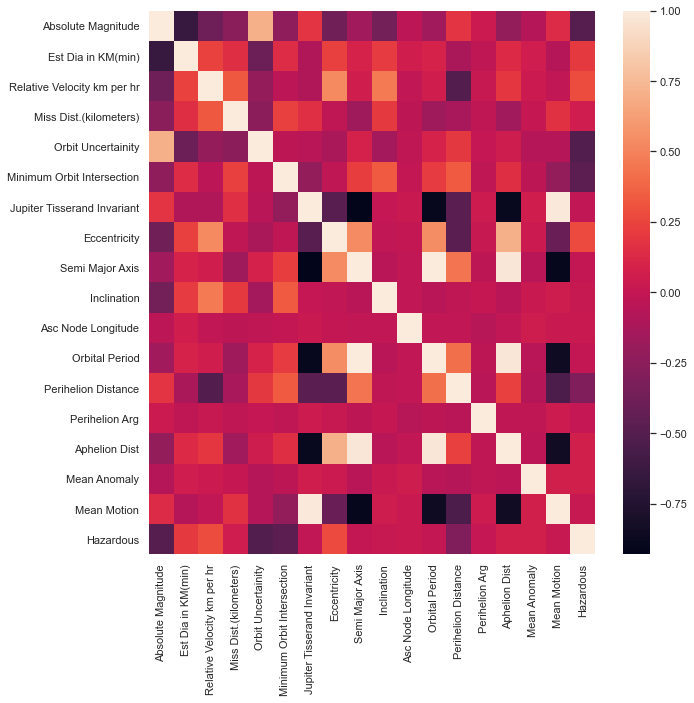

In [169]:
sns.set(style='darkgrid')
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr())

<AxesSubplot:>

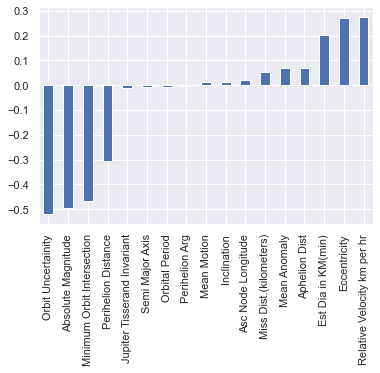

In [170]:
# show feature correlation to hazardous class
df.corr()['Hazardous'][:-1].sort_values().plot(kind='bar')

True     3932
False    3932
Name: Hazardous, dtype: int64




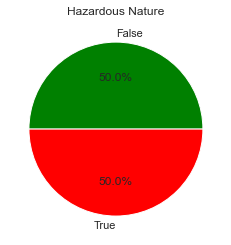

In [171]:
# get the values
print(df['Hazardous'].value_counts())
print('\n')

# show class value chart
lab = 'False','True'
plt.pie(df['Hazardous'].value_counts(), labels = lab, colors = ['green','red'],
        autopct='%1.1f%%')
plt.title('Hazardous Nature')
plt.show()

In [172]:
# get the values
print(df['Orbit Uncertainity'].value_counts())
print('\n')

# show Orbit uncertainty value chart
df1 = df.groupby(["Orbit Uncertainity"]).count().reset_index()

fig = px.bar(df1,
    y=df.groupby(["Orbit Uncertainity"]).size()/len(df)*100,
    x="Orbit Uncertainity")
fig.update_layout(yaxis_title='percentage',
    title_text='Orbit Uncertainity')
fig.show()

0.000000    3321
0.111111    1085
0.777778     715
0.666667     681
0.222222     513
0.555556     408
0.333333     346
0.444444     342
0.888889     330
1.000000     123
Name: Orbit Uncertainity, dtype: int64




<AxesSubplot:title={'center':'Orbit Uncertainity vs. Hazardous Nature'}, xlabel='Orbit Uncertainity'>

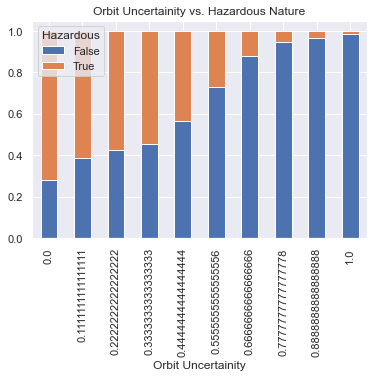

In [173]:
# show Uncertainty vs Hazardous chart
df.groupby('Orbit Uncertainity')['Hazardous'].value_counts(normalize=True).unstack('Hazardous').plot.bar(stacked=True, title='Orbit Uncertainity vs. Hazardous Nature')

Text(0.5, 1.0, 'Absolute Magnitude')

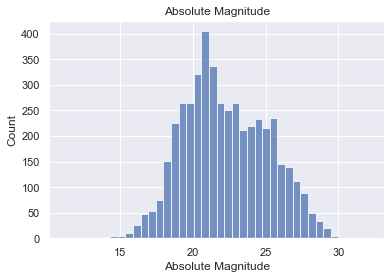

In [174]:
# show Absolute Magnitude chart
sns.histplot(data['Absolute Magnitude']).set_title('Absolute Magnitude')

Text(0.5, 1.0, 'Absolute Magnitude vs. Hazardous Nature')

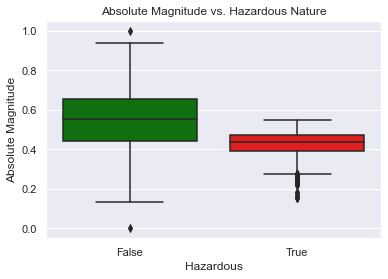

In [175]:
# show Absolute Magnitude vs Hazardous chart
sns.boxplot(x="Hazardous", y="Absolute Magnitude",data=df,palette=('green','red')).set_title('Absolute Magnitude vs. Hazardous Nature')

Text(0.5, 1.0, 'Minimum Orbit Intersection')

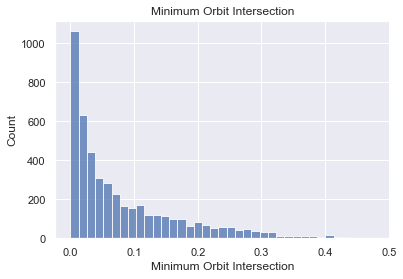

In [176]:
# show  Minimum Orbit Intersection chart
sns.histplot(data['Minimum Orbit Intersection']).set_title('Minimum Orbit Intersection')

Text(0.5, 1.0, 'Minimum Orbit Intersection vs. Hazardous Nature')

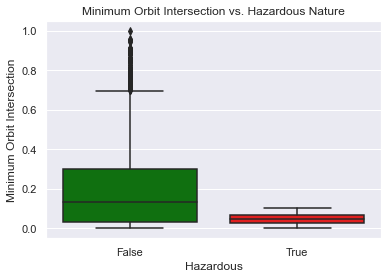

In [177]:
# show Minimum Orbit Intersection vs Hazardous chart
sns.boxplot(x="Hazardous", y="Minimum Orbit Intersection",data=df,palette=('green','red')).set_title('Minimum Orbit Intersection vs. Hazardous Nature')

Text(0.5, 1.0, 'Perihelion Distance')

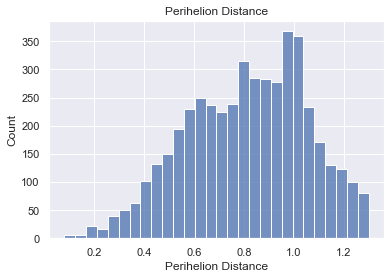

In [178]:
# show  Perihelion Distance chart
sns.histplot(data['Perihelion Distance']).set_title('Perihelion Distance')

Text(0.5, 1.0, 'Perihelion Distance vs. Hazardous Nature')

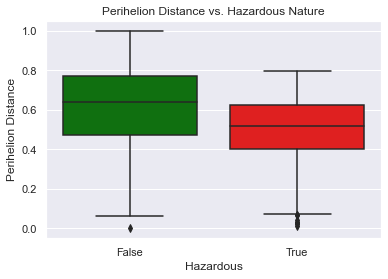

In [179]:
# show Perihelion Distance vs Hazardous chart
sns.boxplot(x="Hazardous", y="Perihelion Distance",data=df,palette=('green','red')).set_title('Perihelion Distance vs. Hazardous Nature')

Text(0.5, 1.0, 'Estimated diameter(min)')

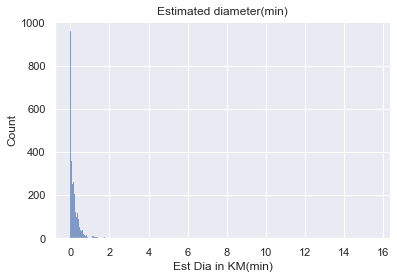

In [180]:
# show Est Dia in KM(min) chart
sns.histplot(data['Est Dia in KM(min)']).set_title('Estimated diameter(min)')

Text(0.5, 1.0, 'Estimated diameter(min) vs. Hazardous Nature')

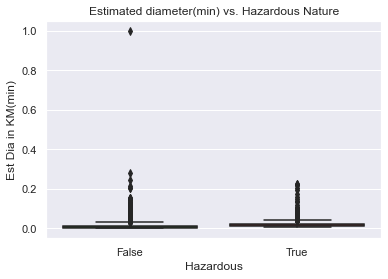

In [181]:
# show Estimated diameter(min) vs. Hazardous chart
sns.boxplot(x="Hazardous", y="Est Dia in KM(min)",data=df,palette=('green','red')).set_title('Estimated diameter(min) vs. Hazardous Nature')

Text(0.5, 1.0, 'Eccentricity')

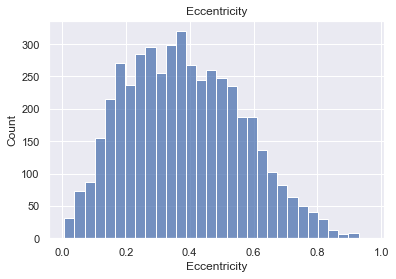

In [182]:
# show Eccentricity chart
sns.histplot(data['Eccentricity']).set_title('Eccentricity')

Text(0.5, 1.0, 'Eccentricity vs. Hazardous Nature')

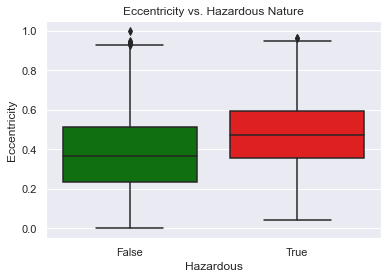

In [183]:
# show Eccentricity vs. Hazardous chart
sns.boxplot(x="Hazardous", y="Eccentricity",data=df,palette=('green','red')).set_title('Eccentricity vs. Hazardous Nature')

Text(0.5, 1.0, 'Relative Velocity')

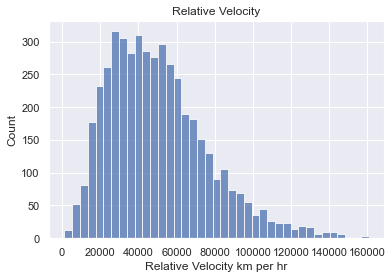

In [184]:
# show Relative Velocity chart
sns.histplot(data['Relative Velocity km per hr']).set_title('Relative Velocity')

Text(0.5, 1.0, 'Relative Velocity vs. Hazardous Nature')

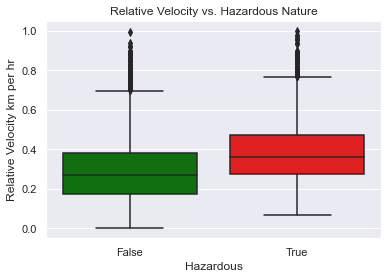

In [185]:
# show Relative Velocity vs. Hazardous Nature chart
sns.boxplot(x="Hazardous", y="Relative Velocity km per hr",data=df,palette=('green','red')).set_title('Relative Velocity vs. Hazardous Nature')

In [186]:
# prepare feature and class
y=df["Hazardous"]
x=df.drop(["Hazardous"],axis=1)

In [187]:
# split dataset for train and test 
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3)
print(train_x.shape)
print(test_x.shape)

(5504, 17)
(2360, 17)


In [188]:
# define a function to train and test the models
def train_test_model(model, train_x, test_x, train_y, test_y,labels):
    ''' 
    Train and test the model using the training and test data sets. 
    Return the predictions, accuracy and metric reports. 
    '''
    model.fit(train_x, train_y)
    predictions = model.predict(test_x)
    accuracy = model.score(test_x, test_y)
    metrics_report = classification_report(test_y, predictions)
    precision, recall, fscore, train_support = score(test_y, predictions, average='weighted')
    return predictions, accuracy, metrics_report, (precision, recall, fscore)

In [189]:
labels = df.Hazardous.unique()
print(labels)

[ True False]


accuracy: 0.9991525423728813
              precision    recall  f1-score   support

       False       1.00      1.00      1.00      1169
        True       1.00      1.00      1.00      1191

    accuracy                           1.00      2360
   macro avg       1.00      1.00      1.00      2360
weighted avg       1.00      1.00      1.00      2360



c:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



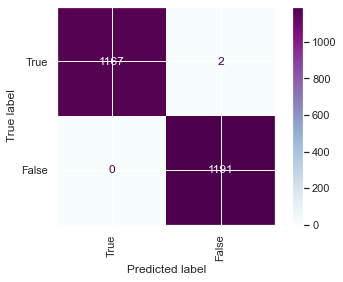

In [190]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0)

# fit & predict model
predictions, accuracy, metrics_report, rf_prf = train_test_model(rf_model, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(rf_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


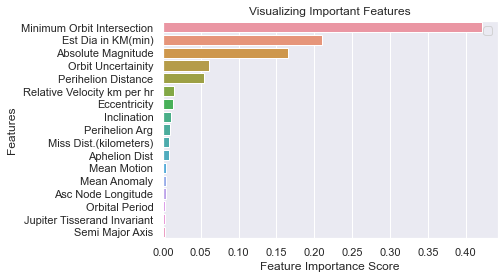

In [191]:
# Visualizing Important Features
feature_imp = pd.Series(rf_model.feature_importances_,index=x.columns.tolist()).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

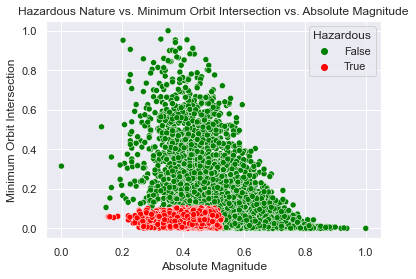

In [192]:
# show Hazardous Nature vs. Minimum Orbit Intersection vs. Absolute Magnitude chart
sns.scatterplot(x=df['Absolute Magnitude'],y=df['Minimum Orbit Intersection'],hue=df['Hazardous'],palette=['green','red']).set_title('Hazardous Nature vs. Minimum Orbit Intersection vs. Absolute Magnitude')
plt.show()

In [193]:
# drop most important feature
df_new = df.drop(['Minimum Orbit Intersection','Absolute Magnitude'],axis = 1)
df_new.head()

,Est Dia in KM(min),Relative Velocity km per hr,Miss Dist.(kilometers),Orbit Uncertainity,Jupiter Tisserand Invariant,Eccentricity,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Mean Anomaly,Mean Motion,Hazardous
0,0.008101,0.130487,0.839102,0.555556,0.357007,0.438763,0.177530,0.079736,0.873489,0.108378,0.596770,0.159035,0.146942,0.735825,0.258239,True
1,0.009311,0.401336,0.766123,0.333333,0.477522,0.361224,0.110378,0.376677,0.379866,0.062396,0.522896,0.869714,0.084790,0.482720,0.388713,False
2,0.014795,0.163781,0.101616,0.000000,0.345731,0.357628,0.189158,0.056020,0.720954,0.116882,0.713687,0.690049,0.142186,0.813777,0.242271,True
3,0.000500,0.244668,0.570624,0.666667,0.424220,0.219426,0.143620,0.104671,0.158852,0.084473,0.740847,0.051949,0.088525,0.190984,0.314430,False
4,0.008101,0.214576,0.815788,0.111111,0.433153,0.212992,0.136823,0.222555,0.235139,0.079847,0.727546,0.439619,0.083102,0.375475,0.327805,True


In [211]:
# create new dataset for train and test

y=df_new["Hazardous"]
x=df_new.drop(["Hazardous"],axis=1)

# split data set into train and test
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=5)
print(train_x.shape)
print(test_x.shape)

(5504, 15)
(2360, 15)


accuracy: 0.9432203389830508
              precision    recall  f1-score   support

       False       0.98      0.91      0.94      1150
        True       0.92      0.98      0.95      1210

    accuracy                           0.94      2360
   macro avg       0.95      0.94      0.94      2360
weighted avg       0.95      0.94      0.94      2360



c:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



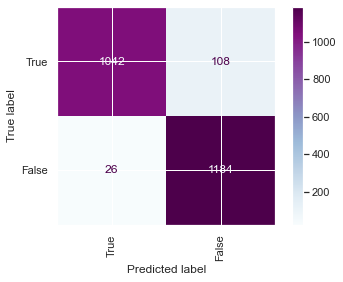

In [212]:
# retry process with new dataset
labels = df_new.Hazardous.unique()

# define the model
rf_model = RandomForestClassifier(n_estimators=100, max_depth=100, min_samples_split=10, n_jobs=-1, verbose=0, random_state=2)

# fit and predict
predictions, accuracy, metrics_report, rf_prf = train_test_model(rf_model, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(rf_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

accuracy: 0.8050847457627118
              precision    recall  f1-score   support

       False       0.83      0.76      0.79      1150
        True       0.79      0.85      0.82      1210

    accuracy                           0.81      2360
   macro avg       0.81      0.80      0.80      2360
weighted avg       0.81      0.81      0.80      2360



c:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



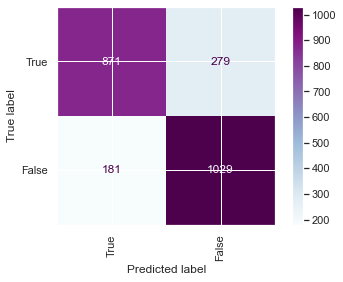

In [213]:
# define the model
nb_model = GaussianNB()

# fit and predict
predictions, accuracy, metrics_report, nb_prf = train_test_model(nb_model, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(nb_model, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

accuracy: 0.7610169491525424
              precision    recall  f1-score   support

       False       0.84      0.63      0.72      1150
        True       0.72      0.89      0.79      1210

    accuracy                           0.76      2360
   macro avg       0.78      0.76      0.76      2360
weighted avg       0.78      0.76      0.76      2360



c:\Users\User\AppData\Local\Programs\Python\Python38-32\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning:

Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.



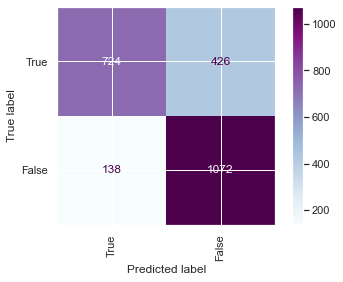

In [214]:
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler

# svm = SVC(gamma='auto',verbose=False,max_iter=10000, tol=1e-5,C=0.7, kernel="sigmoid",random_state=5, decision_function_shape='ovo')

# define the model
svm = LinearSVC(verbose=False, max_iter=10000, tol=1e-5,C=0.1, random_state=5)

# fit and predict
predictions, accuracy, metrics_report, svm_prf = train_test_model(svm, train_x, test_x, train_y, test_y, labels)
print('accuracy: {}'.format(accuracy))
print('='*100)
print(metrics_report)
plot_confusion_matrix(svm, test_x, test_y, display_labels=labels, xticks_rotation='vertical', cmap="BuPu")

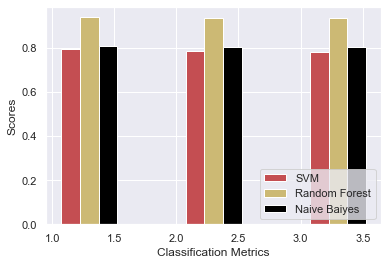

In [199]:
xx = np.array([1,2,3])
width = 0.15
ax = plt.subplot(111)
ax.bar(xx + width, height=np.array(svm_prf), width=width, color='r', align='center', label='SVM')
ax.bar(xx + 2*width, height=np.array(rf_prf), width=width, color='y', align='center', label='Random Forest')
ax.bar(xx + 3*width, height=np.array(nb_prf), width=width, color='black', align='center', label='Naive Baiyes')


plt.xlabel('Classification Metrics')
plt.ylabel('Scores')
plt.legend(loc='lower right')
plt.show()

In [200]:
print("Random Forest")
print("Precission :", rf_prf[0])
print("Recall     :", rf_prf[1])
print("F1 Score   :", rf_prf[2])

print("\nSVM")
print("Precission :", svm_prf[0])
print("Recall     :", svm_prf[1])
print("F1 Score   :", svm_prf[2])

print("\nNaive Baiyes")
print("Precission :", nb_prf[0])
print("Recall     :", nb_prf[1])
print("F1 Score   :", nb_prf[2])

Random Forest
Precission : 0.9389875541609262
Recall     : 0.9351557533375715
F1 Score   : 0.93510479230284

SVM
Precission : 0.7956670090470785
Recall     : 0.7838525111252383
F1 Score   : 0.7824704961771128

Naive Baiyes
Precission : 0.8103042616382683
Recall     : 0.8061029879211697
F1 Score   : 0.805836379715795
